In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib
matplotlib.rcParams.update({'font.size': 12})

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from pylab import rcParams

In [3]:
%matplotlib inline
rcParams['figure.figsize'] =20,8

In [5]:
dataset = pd.read_csv('housing.csv')

In [6]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [7]:
x = dataset.drop('MEDV',axis=1)
y = dataset['MEDV']

In [8]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=3)
print (len(X_test), len(y_test))
print (len(X_train), len(y_train))

152 152
354 354


In [9]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

COST FUNCTION FOR LINEAR REGRESSION
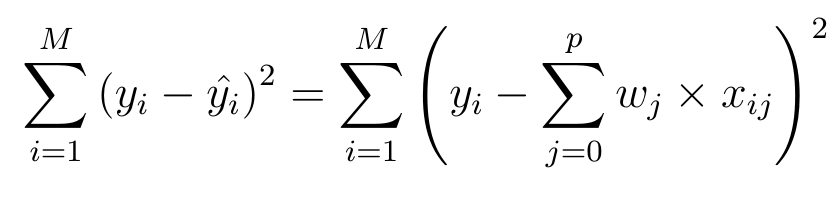

In [10]:
rr = Ridge(alpha=0.01)
# higher the alpha value, more restriction on the coefficients; low alpha > more generalization,
# in this case linear and ridge regression resembles
rr.fit(X_train, y_train)

Ridge(alpha=0.01)

In [11]:
rr100 = Ridge(alpha=100) #  comparison with alpha value
rr100.fit(X_train, y_train)

Ridge(alpha=100)

COST FUNCTION FOR RIDGE REGRESSION

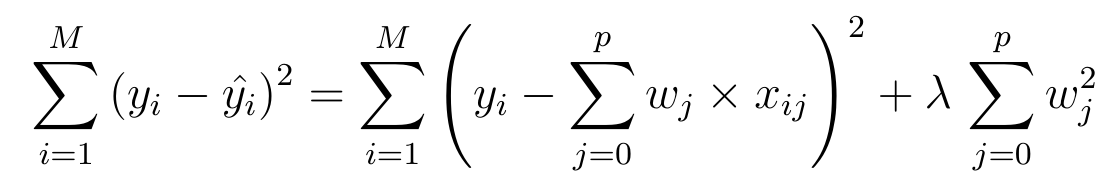

In [12]:
train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)


In [13]:
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)


In [14]:
Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)


In [15]:
print ("linear Regression training score:", train_score)
print ("linear Regression test score: ", test_score)

print("***********")
print ("Ridge Regression training score with alpha=.01:", Ridge_train_score)
print ("Ridge Regression test score with alpha=.01: ", Ridge_test_score)

print("***********")
print ("Ridge Regression training score with alpha=100:", Ridge_train_score)
print ("Ridge Regression test score with alpha=100: ", Ridge_test_score)

print("***********")


linear Regression training score: 0.7419034960343789
linear Regression test score:  0.7147895265576858
***********
Ridge Regression training score with alpha=.01: 0.7419030253527293
Ridge Regression test score with alpha=.01:  0.7146125373123908
***********
Ridge Regression training score with alpha=100: 0.7419030253527293
Ridge Regression test score with alpha=100:  0.7146125373123908
***********


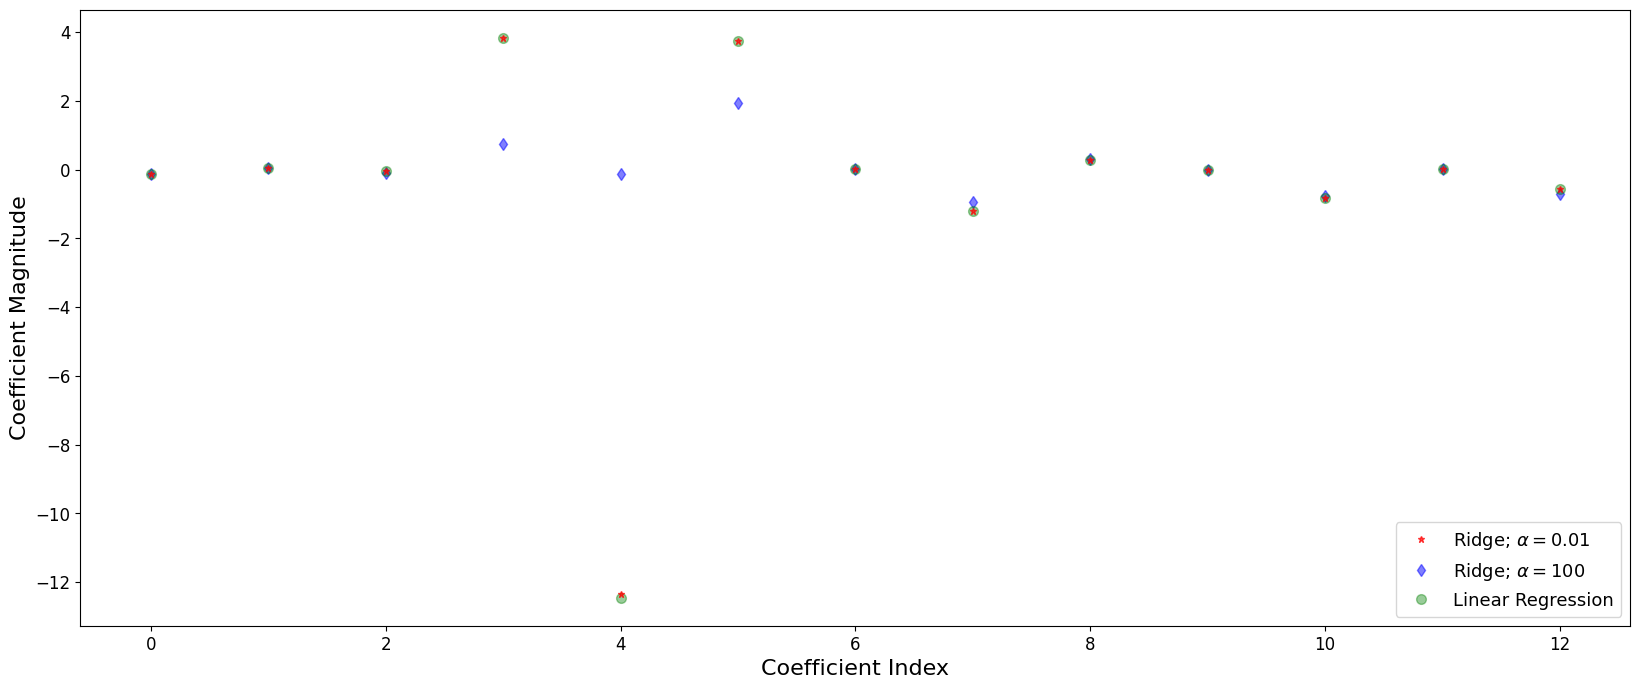

In [16]:
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7)
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$')
plt.plot(lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

**For low value of α (0.01), when the coefficients are less restricted, the magnitudes of the coefficients are almost same as of linear regression.**

**For higher value of α (100), we see that for coefficient indices 3,4,5 the magnitudes are considerably less compared to linear regression case. This is an example of shrinking coefficient magnitude using Ridge regression.**




# COST FUNCTION OF LASSO REGRESSION
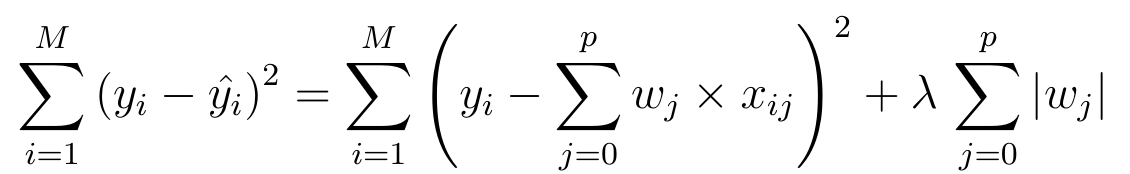

In [17]:
from sklearn.linear_model import Lasso

In [18]:
lasso = Lasso()
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)


In [19]:
print ("training score:", train_score)
print ("test score: ", test_score)
print ("number of features used: ", coeff_used)

training score: 0.6832133784853487
test score:  0.6364462662362061
number of features used:  11


In [25]:
lasso001 = Lasso(alpha=0.1)
lasso001.fit(X_train,y_train)
train_score001=lasso001.score(X_train,y_train)
test_score001=lasso001.score(X_test,y_test)
coeff_used001 = np.sum(lasso001.coef_!=0)

In [26]:
print ("training score for alpha=0.01:", train_score001)
print ("test score for alpha =0.01: ", test_score001)
print ("number of features used: for alpha =0.01:", coeff_used001)

training score for alpha=0.01: 0.7345141994809461
test score for alpha =0.01:  0.6944794936282603
number of features used: for alpha =0.01: 12


In [34]:
lasso10 = Lasso(alpha=10)
lasso10.fit(X_train,y_train)
train_score10=lasso10.score(X_train,y_train)
test_score10=lasso10.score(X_test,y_test)
coeff_used10 = np.sum(lasso10.coef_!=0)

In [35]:
print ("training score for alpha=10:", train_score10)
print ("test score for alpha =10: ", test_score10)
print ("number of features used: for alpha =10:", coeff_used10)

training score for alpha=10: 0.5447171420798448
test score for alpha =10:  0.5008732402949982
number of features used: for alpha =10: 4


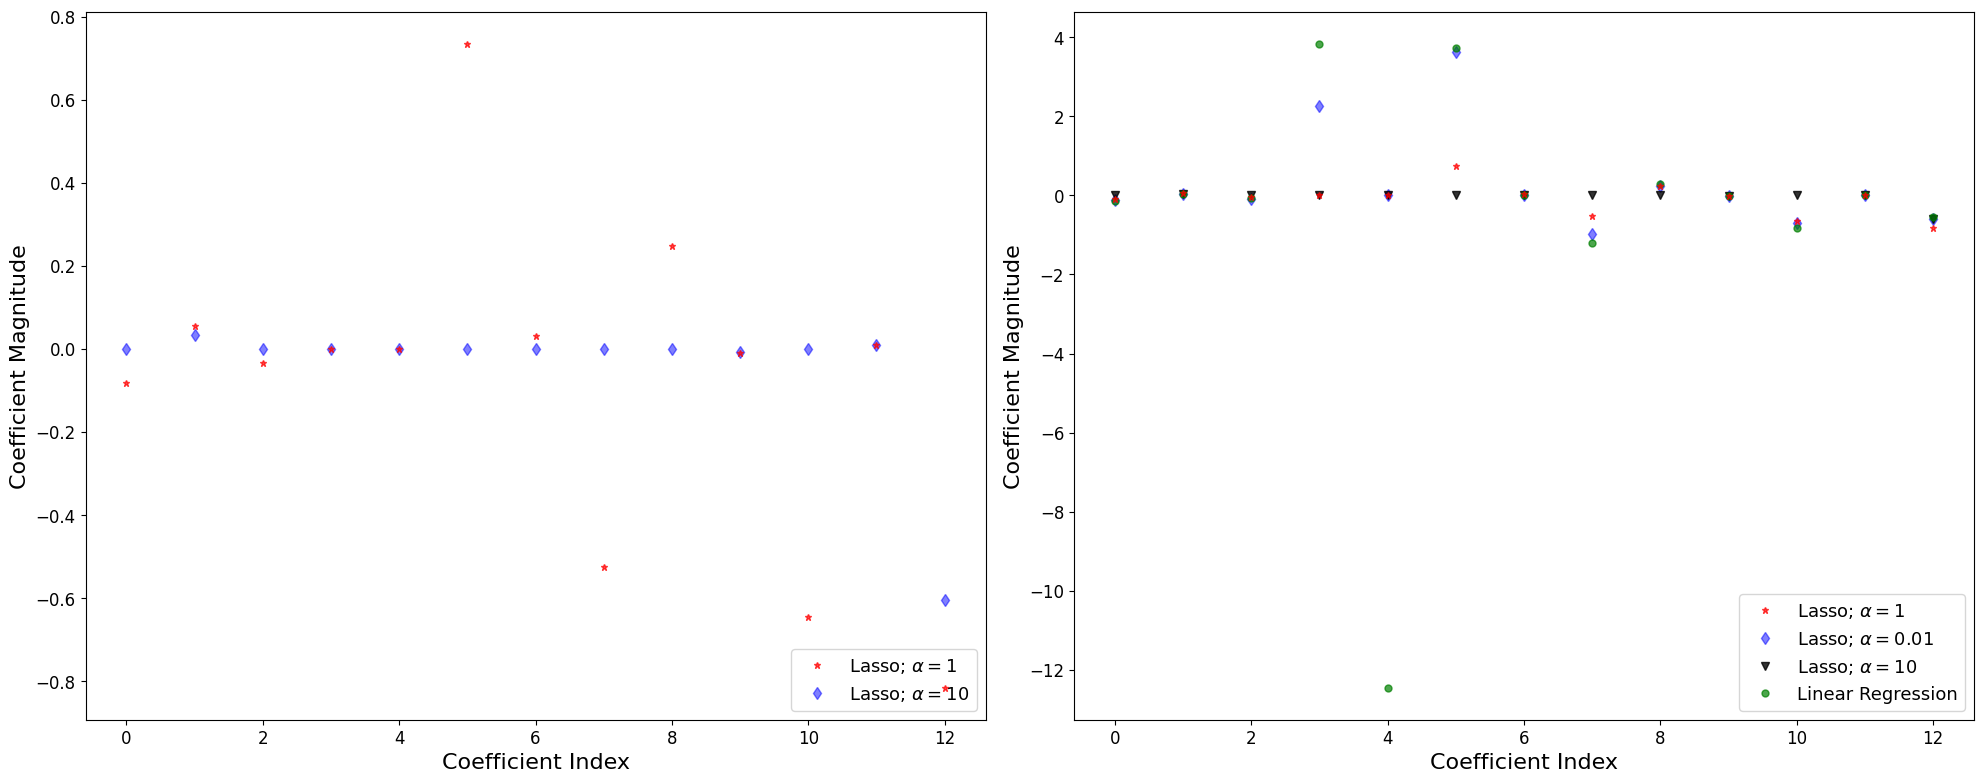

In [36]:
plt.subplot(1,2,1)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso10.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 10$') # alpha here is for transparency

plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.subplot(1,2,2)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.plot(lasso10.coef_,alpha=0.8,linestyle='none',marker='v',markersize=6,color='black',label=r'Lasso; $\alpha = 10$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.7,linestyle='none',marker='o',markersize=5,color='green',label='Linear Regression',zorder=2)
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.tight_layout()
plt.show()




*   The default value of regularization parameter in **Lasso regression, α= 1**,

*   **Regularization Paramter α = 1**, out of **13 features, non-zero value of coefficient Features: 11 features**and gave **training score = 0.68** and **test Score = 0.63**

*   **Regularization Parameter α = 0.01**, **non-zero features =13**, training and test score increases. **Training Score =0.74** and **Test Score=0.70**

*   **Regularization Parameter α = 10**, **non-zero features =4**, training and test score decresess. **Training Score =0.54** and **Test Score=0.50**